In [1]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
SM_file = "/users/eleves-b/2022/baptiste.barthe-gold/Documents/Comput_HEP/MG5_aMC_v2_9_22/VBF-SM/Events/run_01/unweighted_events.lhe.gz"
O1_file = "/users/eleves-b/2022/baptiste.barthe-gold/Documents/Comput_HEP/MG5_aMC_v2_9_22/VBF-cW-1/Events/run_01/unweighted_events.lhe.gz"
O2_file = "/users/eleves-b/2022/baptiste.barthe-gold/Documents/Comput_HEP/MG5_aMC_v2_9_22/VBF-cW-2/Events/run_01/unweighted_events.lhe.gz"

events_SM = pylhe.read_lhe_with_attributes(SM_file)
events_O1 = pylhe.read_lhe_with_attributes(O1_file)
events_O2 = pylhe.read_lhe_with_attributes(O2_file)

In [3]:
def extract_4m(events):
    cross_section_weight, quarks_4m, leptons_4m = [], [], []

    for event in events:
        # select only final state particles
        part = [i for i in event.particles if i.status == 1.0]

        # select only quarks up to charm
        quarks = [i for i in part if abs(i.id) <= 4]

        # select only leptons
        leptons = [i for i in part if abs(i.id) in [11, 13, 15]]

        # sanity check, we expect quarks and leptons to be a list of two elements
        assert len(quarks) == 2, f"Length of selected quarks is not 2: {len(quarks)}"
        assert len(leptons) == 2, f"Length of selected leptons is not 2: {len(leptons)}"

        quarks_4m.append(
            [
                {
                    "px": quarks[0].px,
                    "py": quarks[0].py,
                    "pz": quarks[0].pz,
                    "e": quarks[0].e,
                },
                {
                    "px": quarks[1].px,
                    "py": quarks[1].py,
                    "pz": quarks[1].pz,
                    "e": quarks[1].e,
                },
            ]
        )

        leptons_4m.append(
            [
                {
                    "px": leptons[0].px,
                    "py": leptons[0].py,
                    "pz": leptons[0].pz,
                    "e": leptons[0].e,
                },
                {
                    "px": leptons[1].px,
                    "py": leptons[1].py,
                    "pz": leptons[1].pz,
                    "e": leptons[1].e,
                },
            ]
        )

        cross_section_weight.append(event.eventinfo.weight)

    quarks_4m = ak.Array(quarks_4m, with_name="Momentum4D")
    leptons_4m = ak.Array(leptons_4m, with_name="Momentum4D")

    return quarks_4m, leptons_4m, np.array(cross_section_weight)

In [4]:
quarks_4m_SM, leptons_4m_SM, CS_weight_SM = extract_4m(events_SM)
jj_4m_SM = quarks_4m_SM[:, 0] + quarks_4m_SM[:, 1]
ll_4m_SM = leptons_4m_SM[:, 0] + leptons_4m_SM[:, 1]

quarks_4m_O1, leptons_4m_O1, CS_weight_O1 = extract_4m(events_O1)
jj_4m_O1 = quarks_4m_O1[:, 0] + quarks_4m_O1[:, 1]
ll_4m_O1 = leptons_4m_O1[:, 0] + leptons_4m_O1[:, 1]

quarks_4m_O2, leptons_4m_O2, CS_weight_O2 = extract_4m(events_O2)
jj_4m_O2 = quarks_4m_O2[:, 0] + quarks_4m_O2[:, 1]
ll_4m_O2 = leptons_4m_O2[:, 0] + leptons_4m_O2[:, 1]

Text(0, 0.5, 'N events')

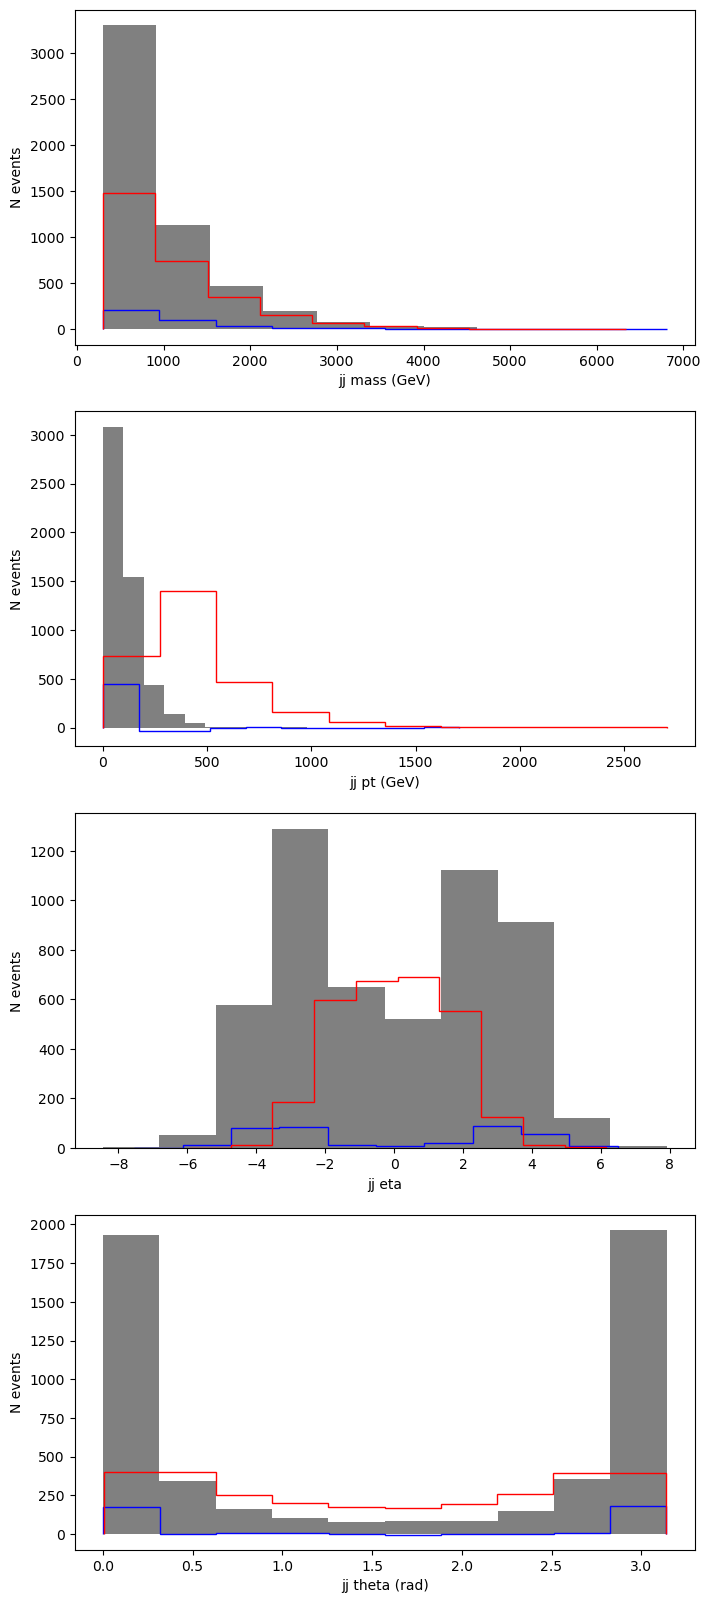

In [5]:
n_bins = 10
sf = 3

fig, ax = plt.subplots(4, 1, figsize=(8, 20))
ax[0].hist(jj_4m_SM.mass, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[0].hist(
    jj_4m_O1.mass, weights=sf * CS_weight_O1, bins=n_bins, color="blue", histtype="step"
)
ax[0].hist(
    jj_4m_O2.mass,
    weights=sf**2 * CS_weight_O2,
    bins=n_bins,
    color="red",
    histtype="step",
)
ax[0].set_xlabel("jj mass (GeV)")
ax[0].set_ylabel("N events")

ax[1].hist(jj_4m_SM.pt, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[1].hist(
    jj_4m_O1.pt, weights=sf * CS_weight_O1, bins=n_bins, color="blue", histtype="step"
)
ax[1].hist(
    jj_4m_O2.pt, weights=sf**2 * CS_weight_O2, bins=n_bins, color="red", histtype="step"
)
ax[1].set_xlabel("jj pt (GeV)")
ax[1].set_ylabel("N events")

ax[2].hist(jj_4m_SM.eta, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[2].hist(
    jj_4m_O1.eta, weights=sf * CS_weight_O1, bins=n_bins, color="blue", histtype="step"
)
ax[2].hist(
    jj_4m_O2.eta,
    weights=sf**2 * CS_weight_O2,
    bins=n_bins,
    color="red",
    histtype="step",
)
ax[2].set_xlabel("jj eta")
ax[2].set_ylabel("N events")

ax[3].hist(jj_4m_SM.theta, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[3].hist(
    jj_4m_O1.theta,
    weights=sf * CS_weight_O1,
    bins=n_bins,
    color="blue",
    histtype="step",
)
ax[3].hist(
    jj_4m_O2.theta,
    weights=sf**2 * CS_weight_O2,
    bins=n_bins,
    color="red",
    histtype="step",
)
ax[3].set_xlabel("jj theta (rad)")
ax[3].set_ylabel("N events")

Text(0, 0.5, 'N events')

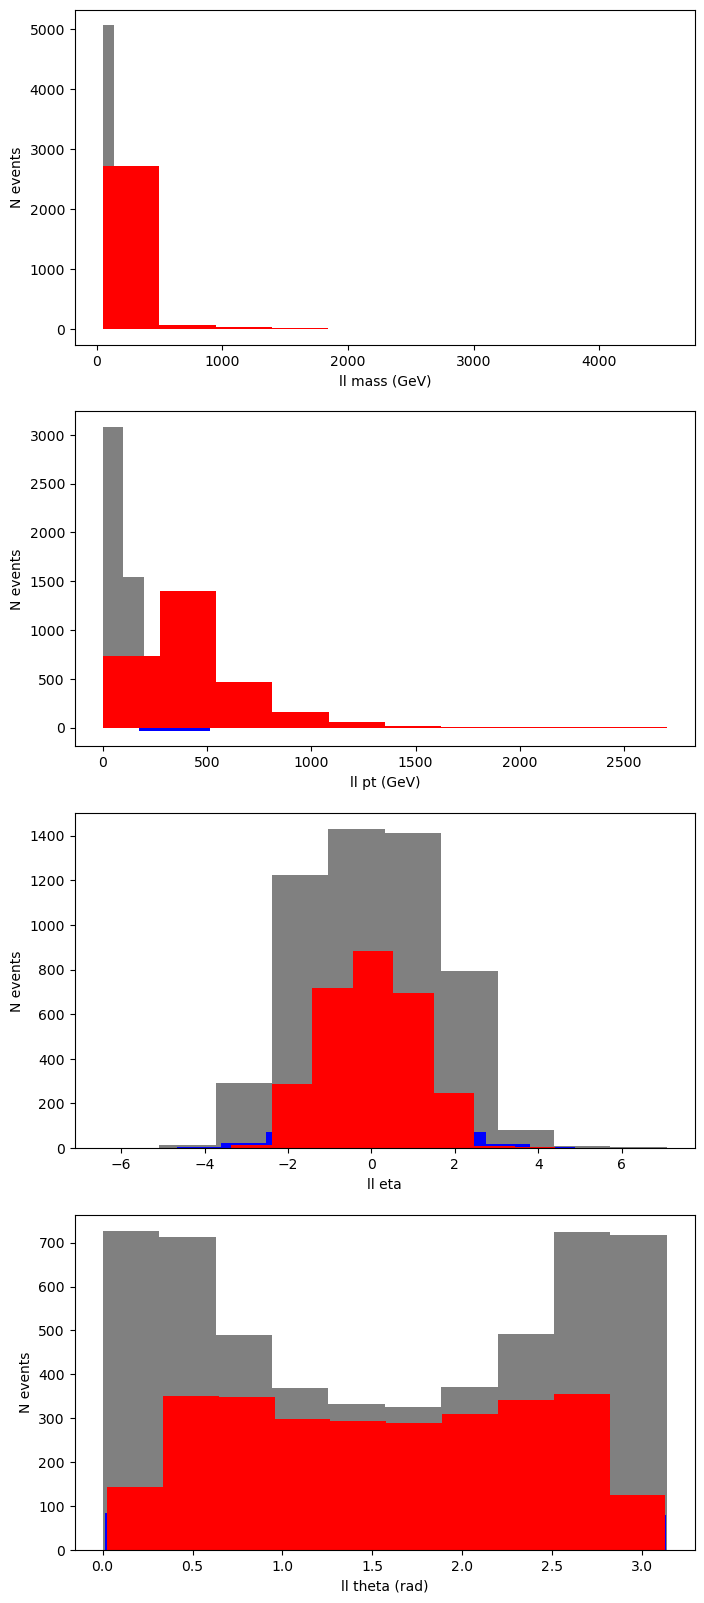

In [6]:
n_bins = 10

fig, ax = plt.subplots(4, 1, figsize=(8, 20))
ax[0].hist(ll_4m_SM.mass, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[0].hist(ll_4m_O1.mass, weights=sf * CS_weight_O1, bins=n_bins, color="blue")
ax[0].hist(ll_4m_O2.mass, weights=sf**2 * CS_weight_O2, bins=n_bins, color="red")
ax[0].set_xlabel("ll mass (GeV)")
ax[0].set_ylabel("N events")

ax[1].hist(ll_4m_SM.pt, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[1].hist(ll_4m_O1.pt, weights=sf * CS_weight_O1, bins=n_bins, color="blue")
ax[1].hist(ll_4m_O2.pt, weights=sf**2 * CS_weight_O2, bins=n_bins, color="red")
ax[1].set_xlabel("ll pt (GeV)")
ax[1].set_ylabel("N events")

ax[2].hist(ll_4m_SM.eta, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[2].hist(ll_4m_O1.eta, weights=sf * CS_weight_O1, bins=n_bins, color="blue")
ax[2].hist(ll_4m_O2.eta, weights=sf**2 * CS_weight_O2, bins=n_bins, color="red")
ax[2].set_xlabel("ll eta")
ax[2].set_ylabel("N events")

ax[3].hist(ll_4m_SM.theta, weights=CS_weight_SM, bins=n_bins, color="gray")
ax[3].hist(ll_4m_O1.theta, weights=sf * CS_weight_O1, bins=n_bins, color="blue")
ax[3].hist(ll_4m_O2.theta, weights=sf**2 * CS_weight_O2, bins=n_bins, color="red")
ax[3].set_xlabel("ll theta (rad)")
ax[3].set_ylabel("N events")

In [7]:
import pandas as pd

process = "cW"
sm = pd.read_csv("./data/SM_10k.csv")
o1 = pd.read_csv(f"./data/{process}_1_10k.csv")
o2 = pd.read_csv(f"./data/{process}_2_10k.csv")

selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_l2",
    "pt_j1",
    "pt_j2",
    "pt_ll",
    "eta_l1",
    "eta_l2",
    "eta_j1",
    "eta_j2",
    "delta_eta_jj",
    "delta_phi_jj",
]

# Apply cuts
sm_w = sm["cross_section_weight"]
o1_w = o1["cross_section_weight"]
o2_w = o2["cross_section_weight"]
# Select variables
sm = sm[selection]
o1 = o1[selection]
o2 = o2[selection]

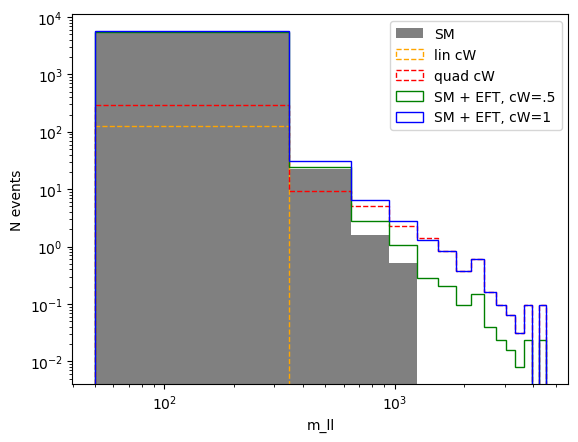

In [ ]:
n_bins = 15
sf = 3
var = "m_ll"
r__ = [
    min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
    max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
]
# r__ = [150, 600]

plt.hist(sm[var], weights=sm_w, bins=n_bins, color="gray", range=r__, label="SM")
plt.hist(
    o1[var],
    weights=o1_w,
    bins=n_bins,
    color="orange",
    histtype="step",
    linestyle="--",
    range=r__,
    label="lin cW",
)
plt.hist(
    o2[var],
    weights=o2_w,
    bins=n_bins,
    color="red",
    histtype="step",
    linestyle="--",
    range=r__,
    label="quad cW",
)

# Compute histograms for both datasets
sm_counts, bin_edges = np.histogram(sm[var], weights=sm_w, bins=n_bins, range=r__)
o1_counts, _ = np.histogram(o1[var], weights=o1_w, bins=n_bins, range=r__)
o2_counts, _ = np.histogram(o2[var], weights=o2_w, bins=n_bins, range=r__)

# Add the two histograms
combined_counts_1 = sm_counts + o1_counts + o2_counts
combined_counts_3 = sm_counts + 0.5 * o1_counts + 0.25 * o2_counts

# Plot the combined histogram
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=combined_counts_3,
    color="green",
    histtype="step",
    label="SM + EFT, cW=.5",
)
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=combined_counts_1,
    color="blue",
    histtype="step",
    label="SM + EFT, cW=1",
)
plt.xlabel(var)
plt.ylabel("N events")
plt.yscale("log")
plt.legend()